# SIEVE ANALYSIS OF FINE AND COARSE AGGREGATES

## Introduction

## Procedure

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Data preparation

In [2]:
displacements = np.array([
    [np.NaN, -0.7, 2],
    [-7, np.NaN, 3],
    [3, 4, np.NaN],
])

rotations = np.array([
    [np.NaN, 0.12, -0.08],
    [-0.2, np.NaN, -0.32],
    [0.15, -0.32, np.NaN],
])

combined = np.array([
    [-0.8, np.NaN],
    [np.NaN, -1.2],
])

### 2. Calculation and analysis functions

In [3]:
def calculate_error(value1, value2):
    abs_diff = np.abs(value1 - value2)
    percent_error = np.float64((abs_diff / np.abs(value1)) * 100 if value1 != 0 else np.inf)
    return abs_diff, percent_error

In [4]:
def analyze_data(data, label):
    error_results = {}
    for i in range(data.shape[0]):
        for j in range(i + 1, data.shape[1]):
            point1, point2 = data[i, 0], data[0, j]
            if point2 != np.NaN and point1 != np.NaN:
                abs_diff, percent_error = calculate_error(data[i, j], data[j, i])

                error_results[f"{point1} & {point2}"] = (abs_diff, percent_error)

                maxwell_holds = np.isclose(abs_diff, 0, atol=1e-6)

                print(
                    f"{label} ({point1} & {point2}):"
                    f"\n  Error: {abs_diff.mean()} ({percent_error.mean():.2f}%)"
                    f"\n  Maxwell Reciprocity: {maxwell_holds}"
                )
    return error_results

### 3. Visualization functions

In [5]:
def plot_errors(error_results, label):
    x = []
    y = []
    yerr = []
    for key, value in error_results.items():
        x.append(key)
        y.append(value[0])
        yerr.append(value[1])
    plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=5, label=label)
    plt.xlabel('Points')
    plt.ylabel('Error')
    plt.legend()

### 4. Get the job done

Displacements (A, B, D) (nan & -0.7):
  Error: 6.3 (900.00%)
  Maxwell Reciprocity: False
Displacements (A, B, D) (nan & 2.0):
  Error: 1.0 (50.00%)
  Maxwell Reciprocity: False
Displacements (A, B, D) (-7.0 & 2.0):
  Error: 1.0 (33.33%)
  Maxwell Reciprocity: False
Rotations (E, F, G) (nan & 0.12):
  Error: 0.32 (266.67%)
  Maxwell Reciprocity: False
Rotations (E, F, G) (nan & -0.08):
  Error: 0.22999999999999998 (287.50%)
  Maxwell Reciprocity: False
Rotations (E, F, G) (-0.2 & -0.08):
  Error: 0.0 (0.00%)
  Maxwell Reciprocity: True
Combined (E, B) (-0.8 & nan):
  Error: nan (nan%)
  Maxwell Reciprocity: False


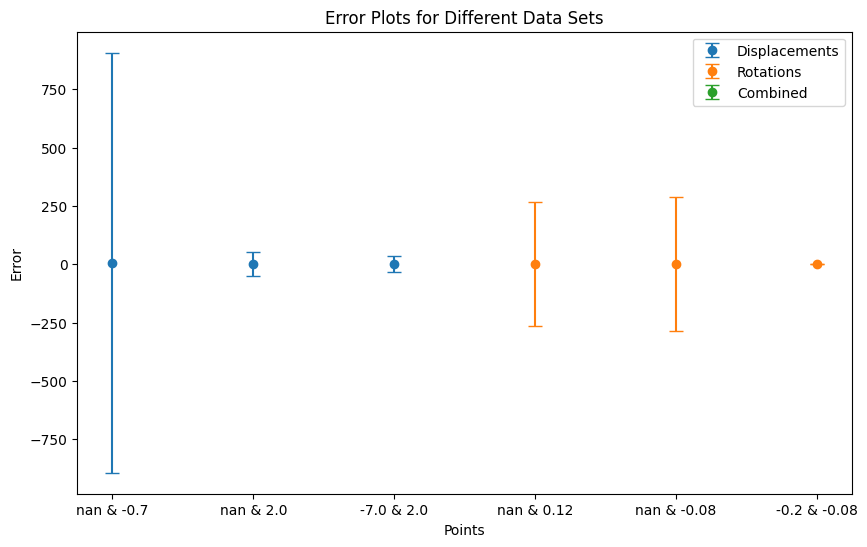

In [6]:
displacements_errors = analyze_data(displacements, "Displacements (A, B, D)")
rotations_errors = analyze_data(rotations, "Rotations (E, F, G)")
combined_errors = analyze_data(combined, "Combined (E, B)")

plt.figure(figsize=(10, 6))
plot_errors(displacements_errors, "Displacements")
plot_errors(rotations_errors, "Rotations")
plot_errors(combined_errors, "Combined")
plt.title('Error Plots for Different Data Sets')
plt.show()